# Imports

In [70]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score


# Cargar el csv

In [71]:
data = pd.read_csv('.\CSV\Activities.csv', sep= ';')

In [72]:
data

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,TE aeróbico,...,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
0,Trail running,14/01/2023 8:21,False,Santa Brígida Trail running,21.48,"1,802",2:40:36,147,172,3.2,...,19.0,0:00,No,02:40:35.89.9,1,26.0,2:37:14,2:47:06,372,837.0
1,Carrera,10/01/2023 8:36,False,Santa Brígida - Series 20x12x15,8.46,673,0:47:09,156,178,3.3,...,20.0,0:00,No,00:08.55.3,15,28.0,0:47:05,0:48:18,474,522.0
2,Trail running,09/01/2023 8:20,False,Santa Brígida Trail running,11.11,"1,044",1:08:56,160,188,4.0,...,19.0,0:00,No,01:08:55.66,1,28.0,1:08:43,1:08:56,366,553.0
3,Trail running,07/01/2023 16:59,False,Santa Brígida Trail running,8.02,810,1:03:47,149,175,3.1,...,20.0,0:00,No,01:03:46.71.1,1,27.0,1:02:40,1:03:47,544,790.0
4,Trail running,04/01/2023 16:54,False,Santa Brígida Trail running,12.08,"1,007",1:28:49,144,158,2.6,...,20.0,0:00,No,01:28:49.19.4,1,26.0,1:28:17,1:28:49,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,21/01/2021 17:20,False,Santa Brígida Carrera,5.01,417,0:27:44,162,179,3.5,...,23.0,0:00,No,00:01.42.4,6,26.0,0:27:36,0:28:11,518,568.0
154,Carrera,19/01/2021 19:24,False,Santa Brígida Carrera,6.30,487,0:38:16,148,181,2.8,...,20.0,0:00,No,02:23.78.1,7,25.0,0:38:13,0:39:51,523,628.0
155,Carrera,13/01/2021 19:28,False,Santa Brígida Carrera,5.01,364,0:27:06,151,167,3.1,...,19.0,0:00,No,00:01.59.5,6,26.0,0:27:00,0:27:06,517,567.0
156,Carrera,11/01/2021 19:29,False,Santa Brígida Carrera,10.01,825,0:58:45,160,183,3.8,...,19.0,0:00,No,00:02.26.6,11,25.0,0:58:37,0:58:45,520,623.0


# Manimulacion de los datos

## Celdas con las que nos quedamos

- Tipo de actividad				
- Distancia	
- Calorías	
- Tiempo	
- Frecuencia cardiaca media		
- TE aeróbico	
- Cadencia de carrera media		
- Ritmo medio		
- Ascenso total	
- Descenso total	
- Longitud media de zancada
- Temperatura mínima					
- Temperatura máxima			
- Altura mínima	
- Altura máxima

In [73]:
data.drop(['Fecha'], axis=1, inplace=True)
data.drop(['Favorito'], axis=1, inplace=True)
data.drop(['Título'], axis=1, inplace=True)
data.drop(['Frecuencia cardiaca máxima'], axis=1, inplace=True)
data.drop(['Cadencia de carrera máxima'], axis=1, inplace=True)
data.drop(['Ritmo óptimo'], axis=1, inplace=True)
data.drop(['Relación vertical media'], axis=1, inplace=True)
data.drop(['Oscilación vertical media'], axis=1, inplace=True)
data.drop(['Tiempo medio de contacto con el suelo'], axis=1, inplace=True)
data.drop(['Cadencia de carrera media.1'], axis=1, inplace=True)
data.drop(['Cadencia de carrera máxima.1'], axis=1, inplace=True)
data.drop(['Training Stress Score®'], axis=1, inplace=True)
data.drop(['Potencia media'], axis=1, inplace=True)
data.drop(['Potencia máxima'], axis=1, inplace=True)
data.drop(['Dificultad'], axis=1, inplace=True)
data.drop(['Fluidez'], axis=1, inplace=True)
data.drop(['Swolf medio'], axis=1, inplace=True)
data.drop(['Velocidad media de palada'], axis=1, inplace=True)
data.drop(['Repeticiones totales'], axis=1, inplace=True)
data.drop(['Tiempo de inmersión'], axis=1, inplace=True)
data.drop(['Intervalo en superficie'], axis=1, inplace=True)
data.drop(['Descompresión'], axis=1, inplace=True)
data.drop(['Mejor tiempo de vuelta'], axis=1, inplace=True)
data.drop(['Número de vueltas'], axis=1, inplace=True)
data.drop(['Tiempo en movimiento'], axis=1, inplace=True)
data.drop(['Tiempo transcurrido'], axis=1, inplace=True)

In [74]:
data

,Tipo de actividad,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,TE aeróbico,Cadencia de carrera media,Ritmo medio,Ascenso total,Descenso total,Longitud media de zancada,Temperatura mínima,Temperatura máxima,Altura mínima,Altura máxima
0,Trail running,21.48,"1,802",2:40:36,147,3.2,137,7:28,991,999,0.97,19.0,26.0,372,837.0
1,Carrera,8.46,673,0:47:09,156,3.3,165,5:34,93,103,1.07,20.0,28.0,474,522.0
2,Trail running,11.11,"1,044",1:08:56,160,4.0,160,6:12,322,326,1.00,19.0,28.0,366,553.0
3,Trail running,8.02,810,1:03:47,149,3.1,138,7:57,425,425,0.91,20.0,27.0,544,790.0
4,Trail running,12.08,"1,007",1:28:49,144,2.6,148,7:21,345,345,0.92,20.0,26.0,414,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Carrera,5.01,417,0:27:44,162,3.5,175,5:32,61,70,1.03,23.0,26.0,518,568.0
154,Carrera,6.30,487,0:38:16,148,2.8,174,6:04,126,119,0.95,20.0,25.0,523,628.0
155,Carrera,5.01,364,0:27:06,151,3.1,175,5:25,65,79,1.06,19.0,26.0,517,567.0
156,Carrera,10.01,825,0:58:45,160,3.8,173,5:52,176,181,0.98,19.0,25.0,520,623.0


## Elimiar filas con campos vacios

- Lo primor es elimincar las filas con valores nulos 
- Luego reindexamos el dataframe

In [75]:
data.drop(data[(data['TE aeróbico'] == '--') ].index, inplace=True)
data.drop(48, inplace=True)

data.reset_index(drop=True, inplace=True)

## Convertimos el campo a tipo numerico

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          154 non-null    object 
 1   Distancia                  154 non-null    float64
 2   Calorías                   154 non-null    object 
 3   Tiempo                     154 non-null    object 
 4   Frecuencia cardiaca media  154 non-null    int64  
 5   TE aeróbico                154 non-null    object 
 6   Cadencia de carrera media  154 non-null    int64  
 7   Ritmo medio                154 non-null    object 
 8   Ascenso total              154 non-null    object 
 9   Descenso total             154 non-null    object 
 10  Longitud media de zancada  154 non-null    float64
 11  Temperatura mínima         154 non-null    float64
 12  Temperatura máxima         154 non-null    float64
 13  Altura mínima              154 non-null    int64  

In [77]:
#for i in range(len(data)):
#    clear_output(wait=True)
#    print(data.iloc[i])
#    time.sleep(5)

### `Tipo de actividad`

In [78]:
tipos = []

for i in range(len(data)):

    tipo = data['Tipo de actividad'][i]

    if tipo not in tipos:
        tipos.append(tipo)

tipos

['Trail running', 'Carrera']

Viendo que solo tenemos dos tipos los cambiaremos de la siguiente manera:
```
Trail running = 0
Carrera = 1
```

In [79]:
data['Tipo de actividad'] = data['Tipo de actividad'].replace([tipos[0], tipos[1]], [0,1])

In [80]:
data['Tipo de actividad']

0      0
1      1
2      0
3      0
4      0
      ..
149    1
150    1
151    1
152    1
153    1
Name: Tipo de actividad, Length: 154, dtype: int64

### `Calorías`

- Lo primero seria desacernos de las `,`.
- Despues usaremos el metodo de pandas `to_numeric()` para pasarlos a numerico.

In [81]:
data['Calorías'] = data['Calorías'].str.replace(',', '')
data['Calorías'] = pd.to_numeric(data['Calorías'])

In [82]:
data['Calorías']

0      1802
1       673
2      1044
3       810
4      1007
       ... 
149     417
150     487
151     364
152     825
153     381
Name: Calorías, Length: 154, dtype: int64

###  `Tiempo`

- Lo primero que haremos sera transformar los datos a `timedelta`
- Despues de eso obtendremos los segundos con `total_seconds()`

In [83]:
data['Tiempo'] = pd.to_timedelta(data['Tiempo'])
data['Tiempo'] = data['Tiempo'].dt.total_seconds()

In [84]:
data['Tiempo']

0      9636.0
1      2829.0
2      4136.0
3      3827.0
4      5329.0
        ...  
149    1664.0
150    2296.0
151    1626.0
152    3525.0
153    1726.0
Name: Tiempo, Length: 154, dtype: float64

### `TE aeróbico `

In [85]:
data['TE aeróbico'] = pd.to_numeric(data['TE aeróbico'])

### `Ritmo medio`

In [86]:
data['Ritmo medio'] = data['Ritmo medio'].str.split(':').apply(lambda x: int(x[0])*60+int(x[1]))
data['Ritmo medio'] = pd.to_numeric(data['Ritmo medio'])

### `Ascenso total`

In [87]:
data['Ascenso total'] = data['Ascenso total'].str.replace(',', '')
data['Ascenso total'] = pd.to_numeric(data['Ascenso total'])

### `Descenso total `

In [88]:
data['Descenso total'] = data['Descenso total'].str.replace(',', '')
data['Descenso total'] = pd.to_numeric(data['Descenso total'])

## Recomprobamos los datos

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tipo de actividad          154 non-null    int64  
 1   Distancia                  154 non-null    float64
 2   Calorías                   154 non-null    int64  
 3   Tiempo                     154 non-null    float64
 4   Frecuencia cardiaca media  154 non-null    int64  
 5   TE aeróbico                154 non-null    float64
 6   Cadencia de carrera media  154 non-null    int64  
 7   Ritmo medio                154 non-null    int64  
 8   Ascenso total              154 non-null    int64  
 9   Descenso total             154 non-null    int64  
 10  Longitud media de zancada  154 non-null    float64
 11  Temperatura mínima         154 non-null    float64
 12  Temperatura máxima         154 non-null    float64
 13  Altura mínima              154 non-null    int64  

# Visualizacion de datos

### Mostrar la matriz de correlación de variables.

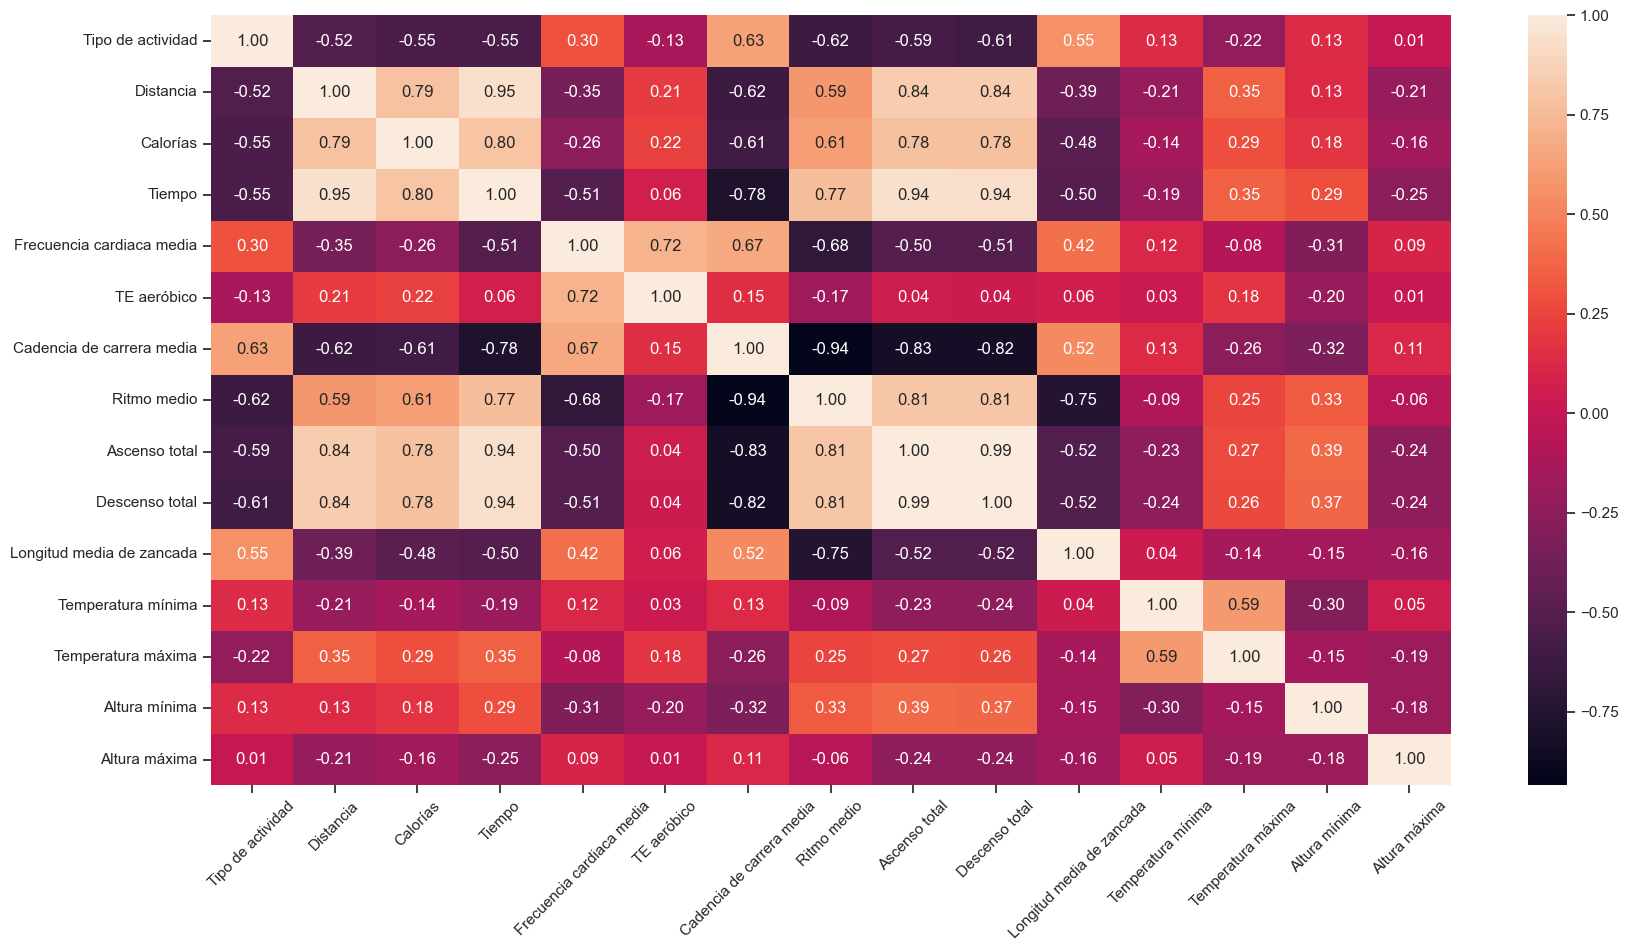

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=data.columns.values,
    rotation=45,
    horizontalalignment='center'
);
plt.show()

### Eliminamos los campos con mucha realacion

- `Distancia`
- `Tiempo` 
- `Acenso total`
- `Descenso total`

In [91]:
data.drop(['Distancia'], axis=1, inplace=True)
data.drop(['Tiempo'], axis=1, inplace=True)
data.drop(['Ascenso total'], axis=1, inplace=True)
data.drop(['Descenso total'], axis=1, inplace=True)

### Volvemos a pintar la matriz de correlación 

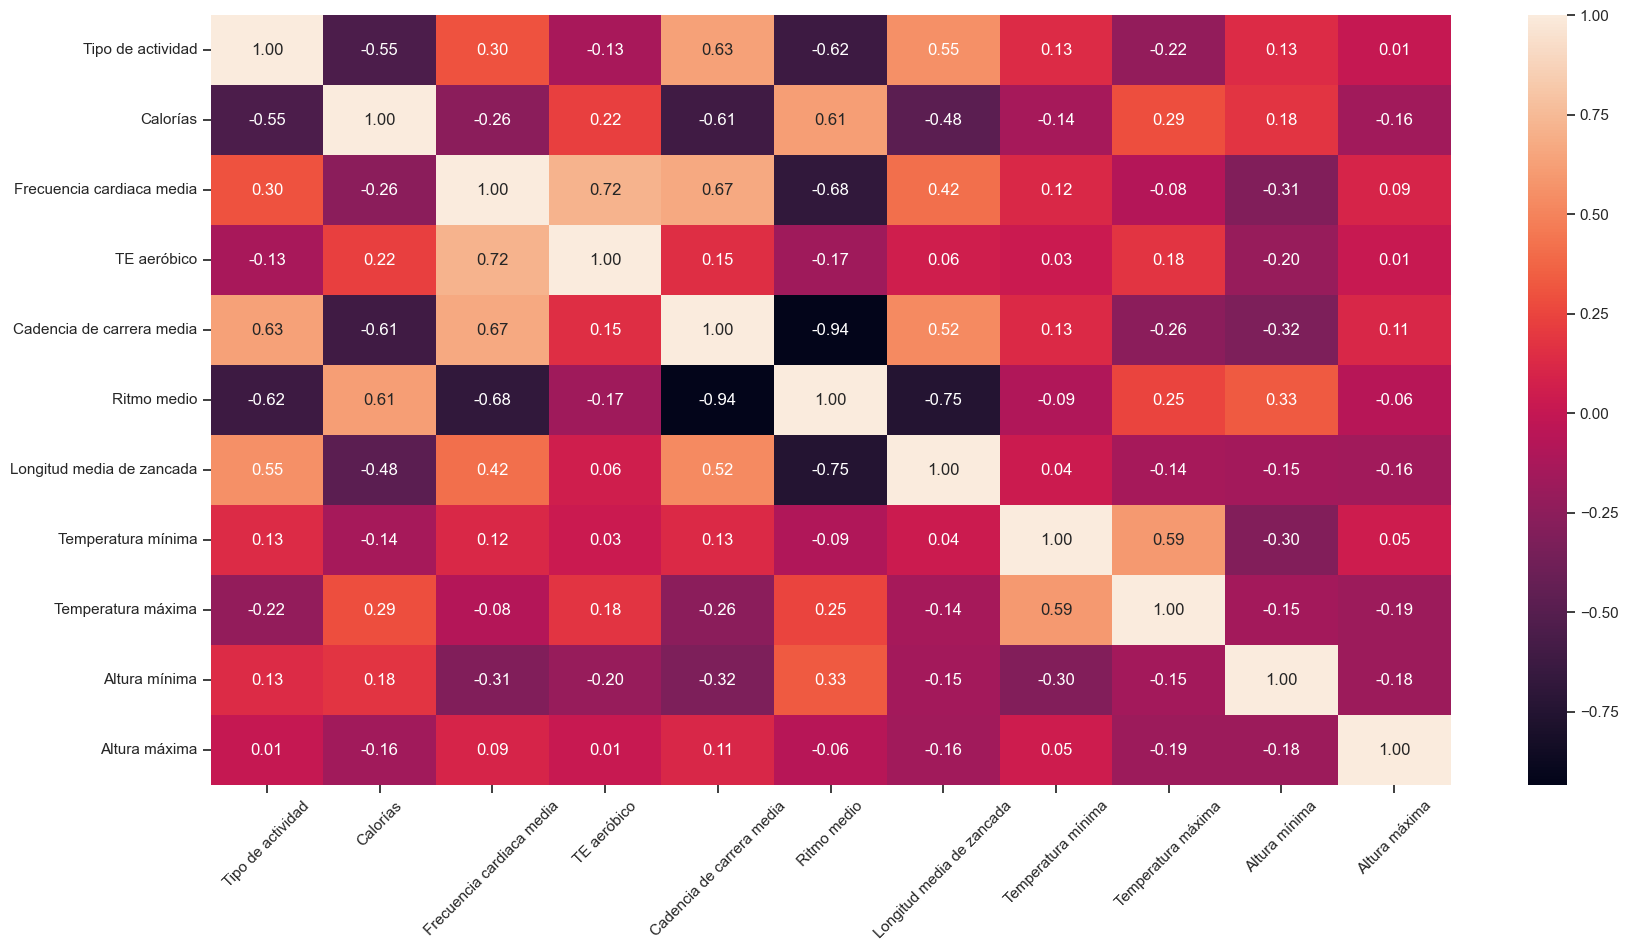

In [92]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=data.columns.values,
    rotation=45,
    horizontalalignment='center'
);
plt.show()

### Mostrar comparativa por pares de variables.

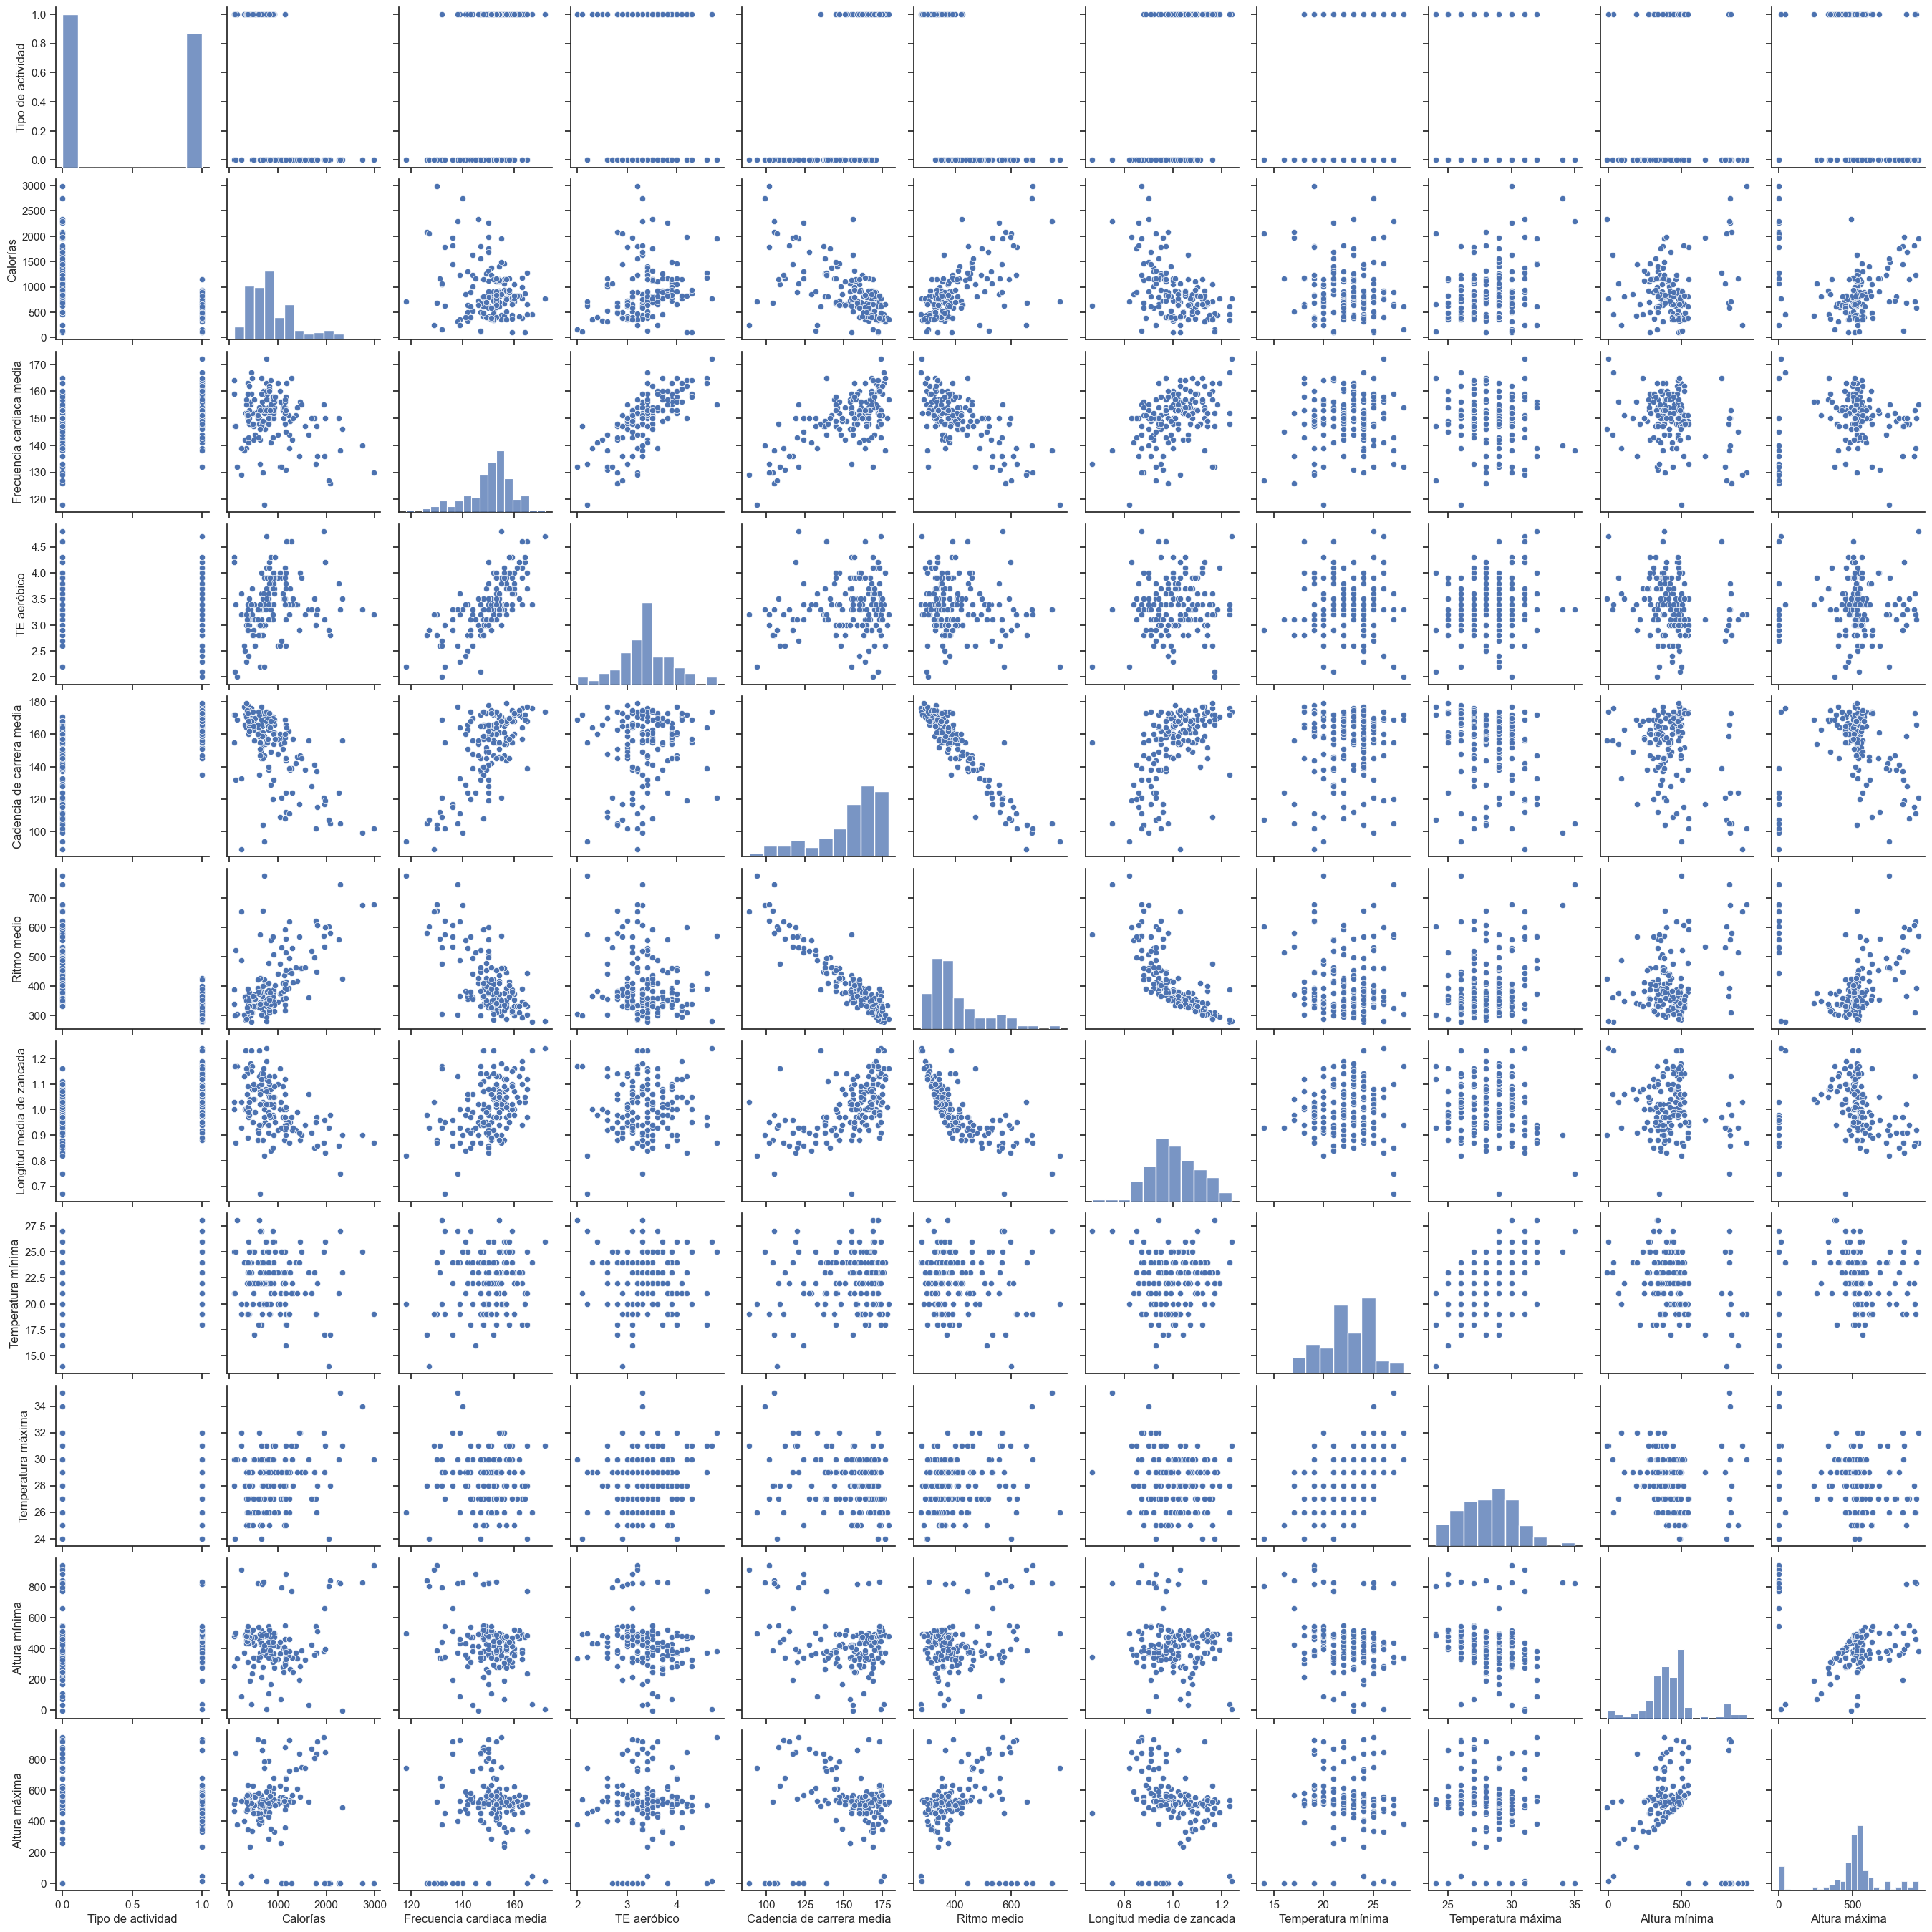

In [93]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)
plt.show()

# Entrenamiento de los datos

## Dataframe completo

### Dividimos el Dataframe en `Xtrain`, `Xtest` , `Ytrain` y `Ytest`

In [94]:
X_data =data.drop('Calorías', axis=1)
Y_data =data['Calorías']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_data, Y_data, test_size=0.2, random_state=7)

### Buscamos el `N_vecinos` que usaremos

In [95]:
res = [] 
for K in range(50):
    K = K+1
    knn = KNeighborsRegressor(K)
    knn.fit(Xtrain, Ytrain)

    #Cross validation
    scores = cross_val_score(knn,Xtrain , Ytrain, cv=5)
    res.append(np.mean(scores))

print(f'N_vecinos {res.index(max(res))+1} => {max(res)}')

N_vecinos 6 => 0.4822621746987242


### Entrenamos el modelo

In [96]:
model = KNeighborsRegressor(6)
model.fit(Xtrain, Ytrain)

KNeighborsRegressor(n_neighbors=6)

### Guardamos la prediccion en `predict`

In [97]:
predict = model.predict(Xtest)

### Comprobamos el resultado

Text(0, 0.5, 'Calorias predichas')

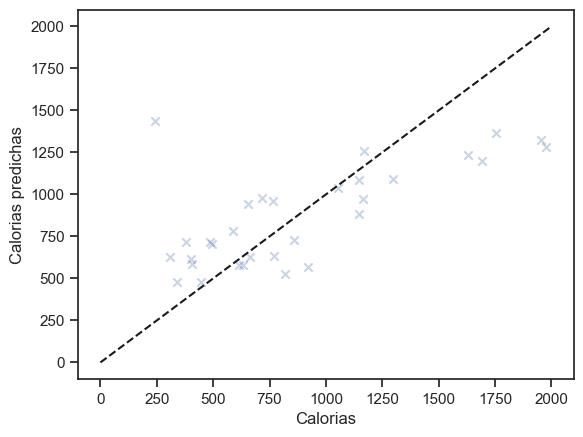

In [98]:
plt.scatter(Ytest, predict , alpha = 0.3, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Calorias predichas")

## Dataframe seleccionado

Vieno la matriz de correlacion surgio la idea de realizar el entrenamiento del modelo solo con los datos con correlacion positiva con las calorias.

Es decir con los siguientes campos:

- TE aeróbico
- Ritmo medio
- Temperatura máxima
- Altura minima

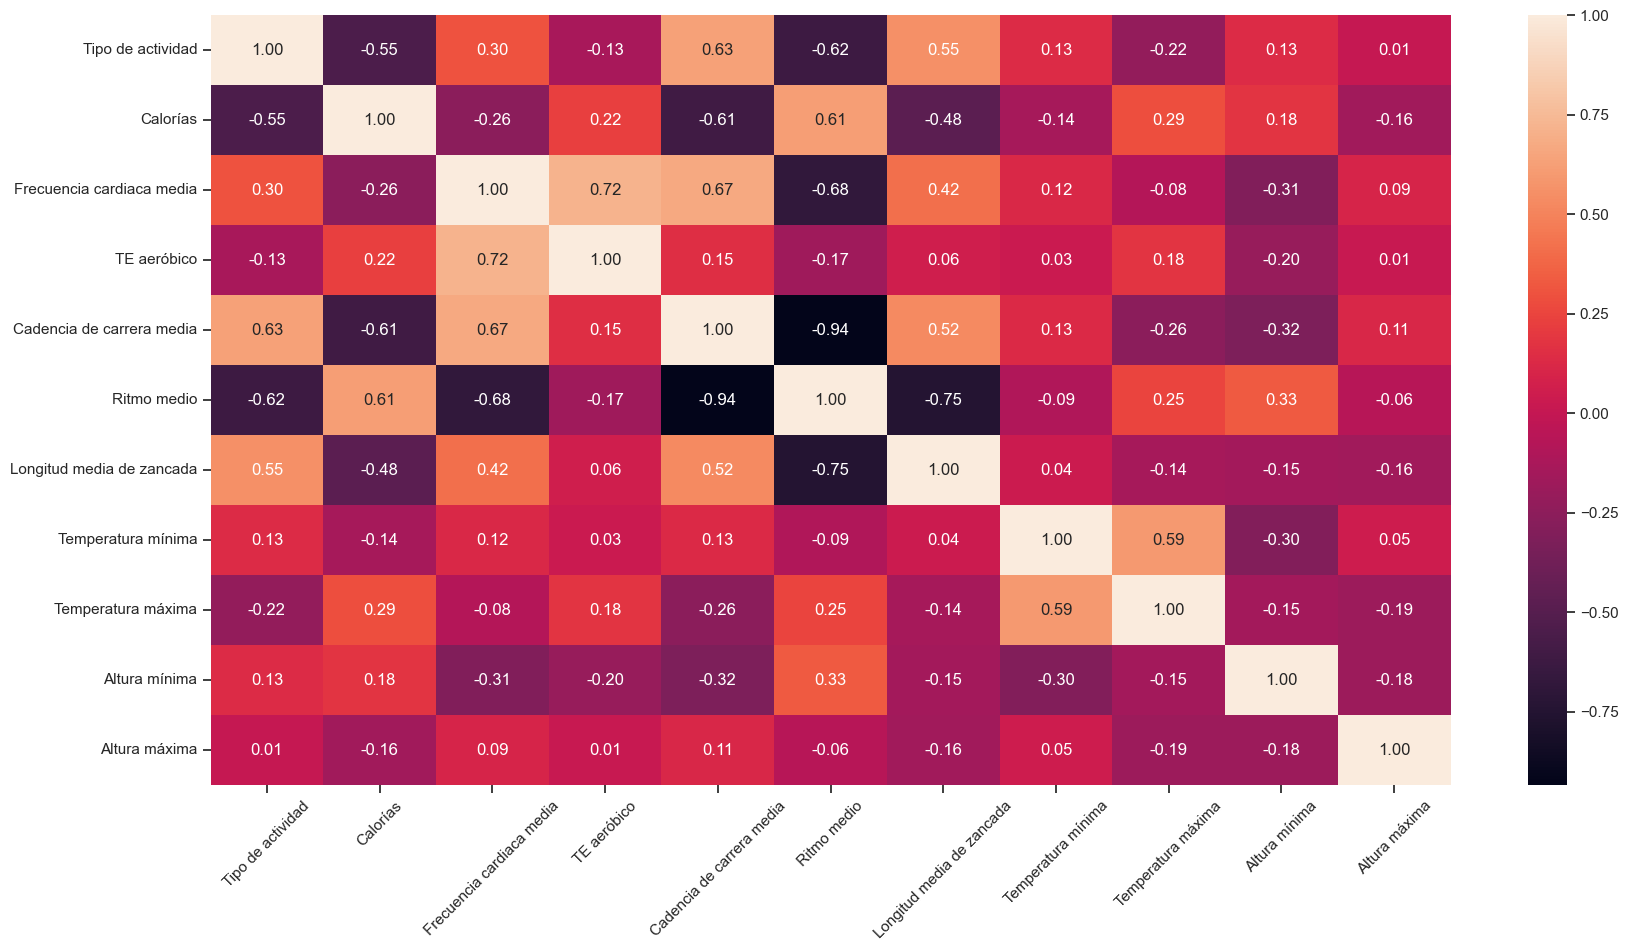

In [99]:
dataShort = data[['TE aeróbico', 'Ritmo medio', 'Temperatura máxima', 'Altura mínima','Calorías']]
dataShort

,TE aeróbico,Ritmo medio,Temperatura máxima,Altura mínima,Calorías
0,3.2,448,26.0,372,1802
1,3.3,334,28.0,474,673
2,4.0,372,28.0,366,1044
3,3.1,477,27.0,544,810
4,2.6,441,26.0,414,1007
...,...,...,...,...,...
149,3.5,332,26.0,518,417
150,2.8,364,25.0,523,487
151,3.1,325,26.0,517,364
152,3.8,352,25.0,520,825


### Dividimos el Dataframe en `Xtrain`, `Xtest` , `Ytrain` y `Ytest`

In [100]:
X_dataS =dataShort.drop('Calorías', axis=1)
Y_dataS =dataShort['Calorías']
XtrainS, XtestS, YtrainS, YtestS = train_test_split(X_dataS, Y_dataS, test_size=0.2, random_state=7)

### Buscamos el `N_vecinos` que usaremos

In [101]:
res = [] 
for K in range(50):
    K = K+1
    knn = KNeighborsRegressor(K)
    knn.fit(XtrainS, YtrainS)

    #Cross validation
    scores = cross_val_score(knn,XtrainS , YtrainS, cv=5)
    res.append(np.mean(scores))

print(f'N_vecinos {res.index(max(res))+1} => {max(res)}')

N_vecinos 8 => 0.4448442632301107


### Entrenamos el modelo

In [102]:
model = KNeighborsRegressor(8)
model.fit(XtrainS, YtrainS)

KNeighborsRegressor(n_neighbors=8)

### Guardamos la prediccion en `predict`

In [103]:
predict = model.predict(XtestS)

### Comprobamos el resultado

Text(0, 0.5, 'Calorias predichas')

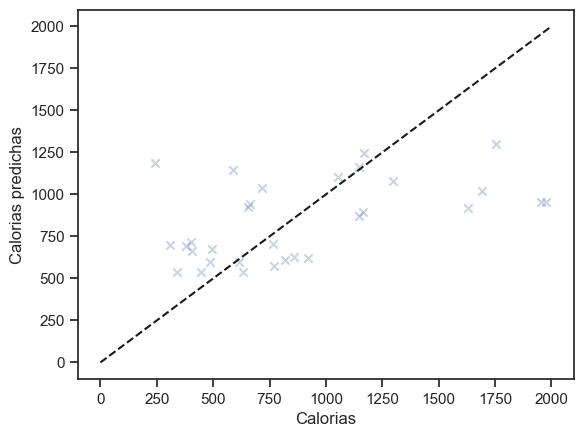

In [104]:
plt.scatter(Ytest, predict , alpha = 0.3, marker = 'x')
plt.plot([0, 2000], [0, 2000], "--k")
plt.axis("tight")
plt.xlabel("Calorias")
plt.ylabel("Calorias predichas")